# Using genetic and non-genetic covariates in QTL studies

#### Webinar for Quantitative Genetics Tools  
#### NIDA Center of Excellence in Omics, Systems Genetics, and the Addictome

Saunak Sen  
Professor and Chief of Biostatistics  
Deparment of Preventive Medicine  
University of Tennessee Health Science Center  
sen@uthsc.edu ~ @saunaksen ~ http://www.senresearch.org

2020-10-09 

Please mute your speakers to reduce any ambient noise that may interfere with others hearing.  

Please ask questions using the chat option at the bottom of your screen.

# Overview

- Covariates and mediators in QTL studies
- Adjusting for covariates
- Genetic relatedness in segregating populations
- Adjusting for relatedness using linear mixed models (LMMs)

# Experimental crosses

If two inbred rat strains show consistent difference in a
phenotype in the same environment, we know the difference must
be genetic. 

By crossing two rat strains we can create a population of 
(approximately) randomly shuffled genomes.

Association between phenotype and genotype may be interpreted to
be causal.

Examples include, backcross and intercross populations,
heterogeneous stock, recombinant inbred lines.

QTL: Quantitative trait loci are genetic loci contributing to
variation in quantitative traits

# Intercross and heterogeneous stock

![CrossFigure](images/HSratsFig1.png)

Credit: Ratgenes.org

# Causal model for QTL inducing correlation between marker and phenotype

In [1]:
library(dagitty)
options(repr.plot.width=6, repr.plot.height=3)
grQtlMarker <- dagitty('dag{
QTL [pos="1,0"]
pheno [pos="2,0"]
marker [pos="1,1"]
meiosis [pos="0,0"]
QTL -> pheno
meiosis -> QTL
meiosis -> marker
}')

Loading required package: ggplot2


Attaching package: ‘ggdag’


The following object is masked from ‘package:stats’:

    filter




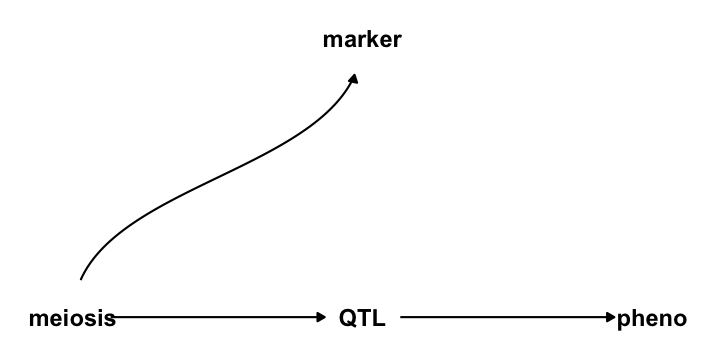

In [2]:
library(ggdag)
theme_set(theme_dag())
grQtlMarker %>%
ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

- Meiosis randomizes the (unobserved) QTL and (observed) marker.  
- The QTL _causes_ the phenotype.
- This leads us to observe an _apparent_ association between marker and phenotype.

Since the QTL (and meiosis) is not directly observable, we test for association between genetic markers and phenotype (trait).  The markers associated with the trait are likely to be physically close to the QTL (idea of genome scan).

See Greenland, Pearl, and Robins (1999) for more on causal diagrams.

# Sex as a covariate

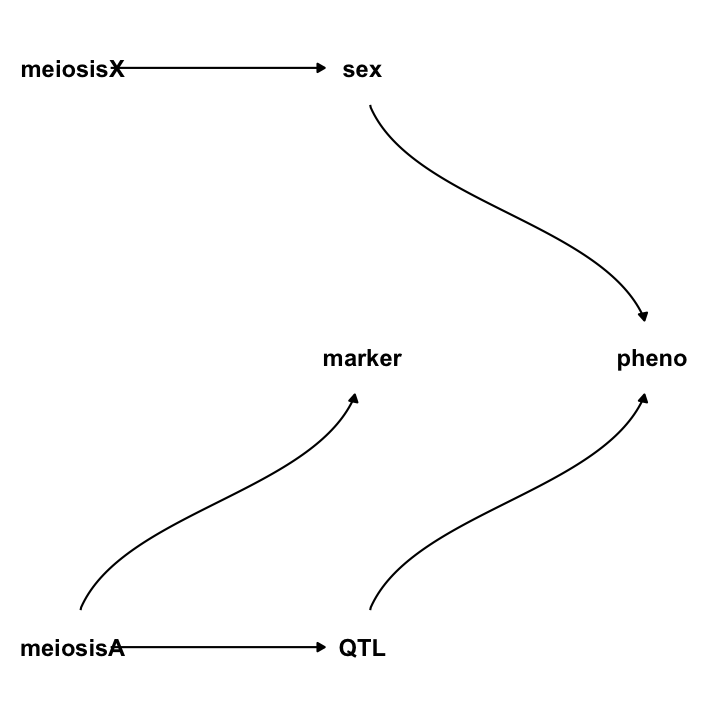

In [3]:
options(repr.plot.width=6, repr.plot.height=6)
grQtlMarkerSex <- dagitty('dag{
QTL [pos="1,0"]
sex [pos="1,2"]
pheno [pos="2,1"]
marker [pos="1,1"]
meiosisA [pos="0,0"]
meiosisX [pos="0,2"]
QTL -> pheno
sex -> pheno
meiosisA -> QTL
meiosisA -> marker
meiosisX -> sex
}')
grQtlMarkerSex %>%
ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

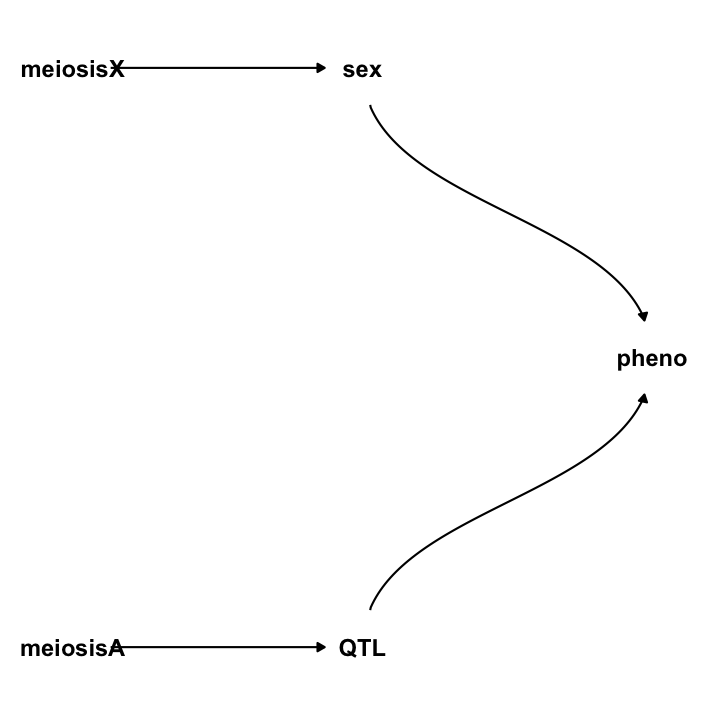

In [4]:
options(repr.plot.width=6, repr.plot.height=6)
grQtlMarkerSex <- dagitty('dag{
QTL [pos="1,0"]
sex [pos="1,2"]
pheno [pos="2,1"]
meiosisA [pos="0,0"]
meiosisX [pos="0,2"]
QTL -> pheno
sex -> pheno
meiosisA -> QTL
meiosisX -> sex
}')
grQtlMarkerSex %>%
ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

# Unlinked QTL as a covariate

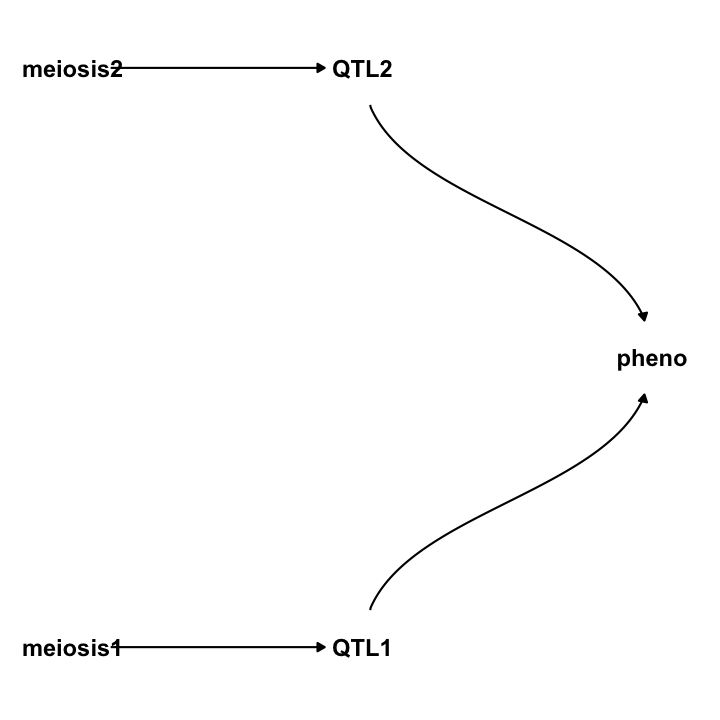

In [5]:
options(repr.plot.width=6, repr.plot.height=6)
gr2Qtl <- dagitty('dag{
QTL1 [pos="1,0"]
QTL2 [pos="1,2"]
pheno [pos="2,1"]
meiosis1 [pos="0,0"]
meiosis2 [pos="0,2"]
QTL1 -> pheno
QTL2 -> pheno
meiosis1 -> QTL1
meiosis2 -> QTL2
}')

gr2Qtl %>%
ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

# Solberg rat data

Data is from a rat F$_2$ intercross.  It has data from several studies that studied depression-like behavior research in the reciprocal intercross of WKY and Fisher 344 rat strains. The data was downloaded from the [QTL Archive](https://phenome.jax.org/projects/Solberg1).  We will use the [R/qtl](https://rqtl.org/) package for analyzing this data.

In [6]:
if(!require("qtl"))
    install.packages("qtl")
library(qtl)

Loading required package: qtl



In [7]:
solbergURL <- "https://phenomedoc.jax.org/QTL_Archive/solberg_2004/Solberg2004_F344xWKY_Data.csv"
cr <- read.cross(file=solbergURL,format="csv",genotypes=c("a","h","b","c","d"),crosstype="f2",alleles=c("F344","WKY"))

 --Read the following data:
	 486  individuals
	 112  markers
	 25  phenotypes


Warning message in fixXgeno.f2(cross, alleles):
“ --Omitted 1 additional X chr genotype(s).”
Warning message in summary.cross(cross):
“Some markers at the same position on chr 6; use jittermap().”


 --Cross type: f2 


In [8]:
names(cr$pheno)

[1] "animal"                "sex"                   "pgm"                  
 [4] "litter"                "DBshocks"              "DBapproaches"         
 [7] "DBlatencytobury"       "DBdurationofburying"   "DBrears"              
[10] "DBgroomtime"           "FSTclimbing"           "FSTimmobility"        
[13] "TSH"                   "OFTinnerlinecrossings" "OFTrears"             
[16] "OFTgroom.time"         "CORT0"                 "CORT10"               
[19] "adrenalwt"             "weight11"              "weight17"             
[22] "glucose30"             "glucpostglucchall"     "fastinggluc"          
[25] "insulinpostglucchall"

# Glucose (phenotype) and body weight

Consider two measurements

- glucose30 (post-restraint stress glucose level collected at 15 weeks)
- weight11 (body weight collected at 11 weeks)

Thease are traits that may be causally connected.  Let us consider two possibilities.

# Body weight as mediator

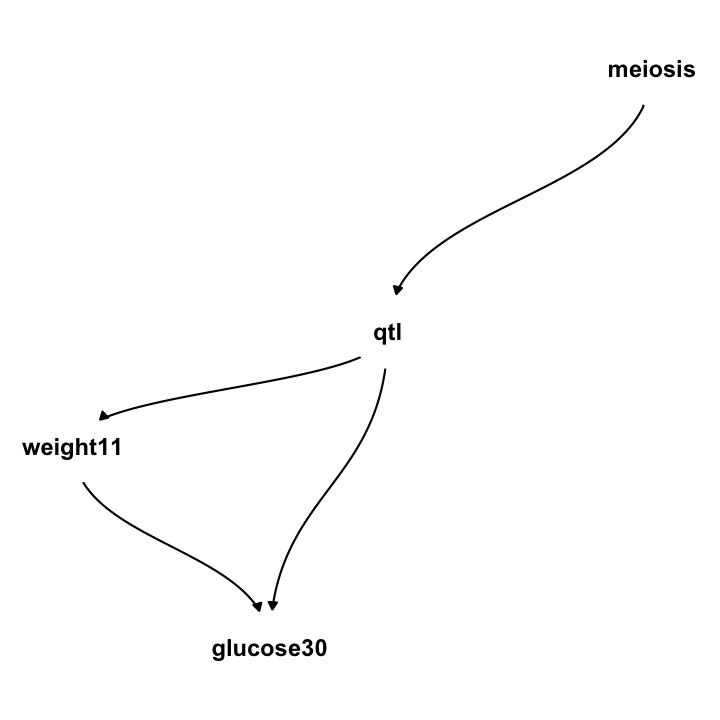

In [9]:
dagify(qtl~meiosis,glucose30~qtl,
       weight11~qtl,
       glucose30~weight11,
      outcome="glucose30",exposure="qtl") %>%

ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

# Body weight as independent effect

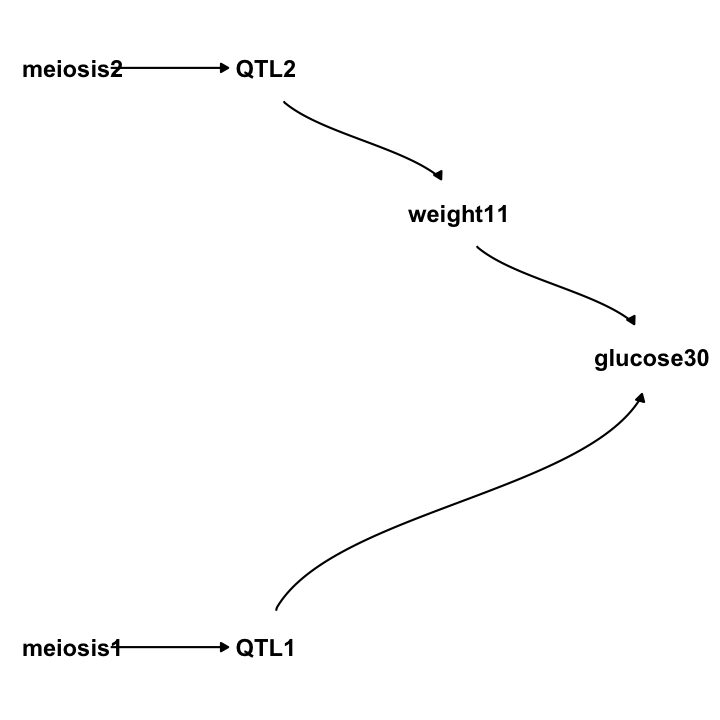

In [10]:
options(repr.plot.width=6, repr.plot.height=6)
glucoseQtl <- dagitty('dag{
QTL1 [pos="1,0"]
QTL2 [pos="1,2"]
weight11 [pos="2,1.5"]
glucose30 [pos="3,1"]
meiosis1 [pos="0,0"]
meiosis2 [pos="0,2"]
QTL1 -> glucose30
QTL2 -> weight11
weight11 -> glucose30
meiosis1 -> QTL1
meiosis2 -> QTL2
}')

glucoseQtl %>%
ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
      geom_dag_point(size=25,color="white") +
      geom_dag_edges_diagonal() +
      geom_dag_text(color="black",size=5) +
      theme_dag()

# Analytic considerations for covariates

- Is it a mediator or independent effect?
- If we ignore body weight in QTL scan for glucose, we get QTL for _total effect_.
- If body weight and glucose have QTL on same chromsomes, and we adjust for body weight we get QTL for _direct effect_.

$$y_i = \mu + \beta g_i + \epsilon_i$$
$$y_i = \mu + \alpha x_i + \beta g_i + \epsilon_i$$

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 28 individuals with missing phenotypes.
”


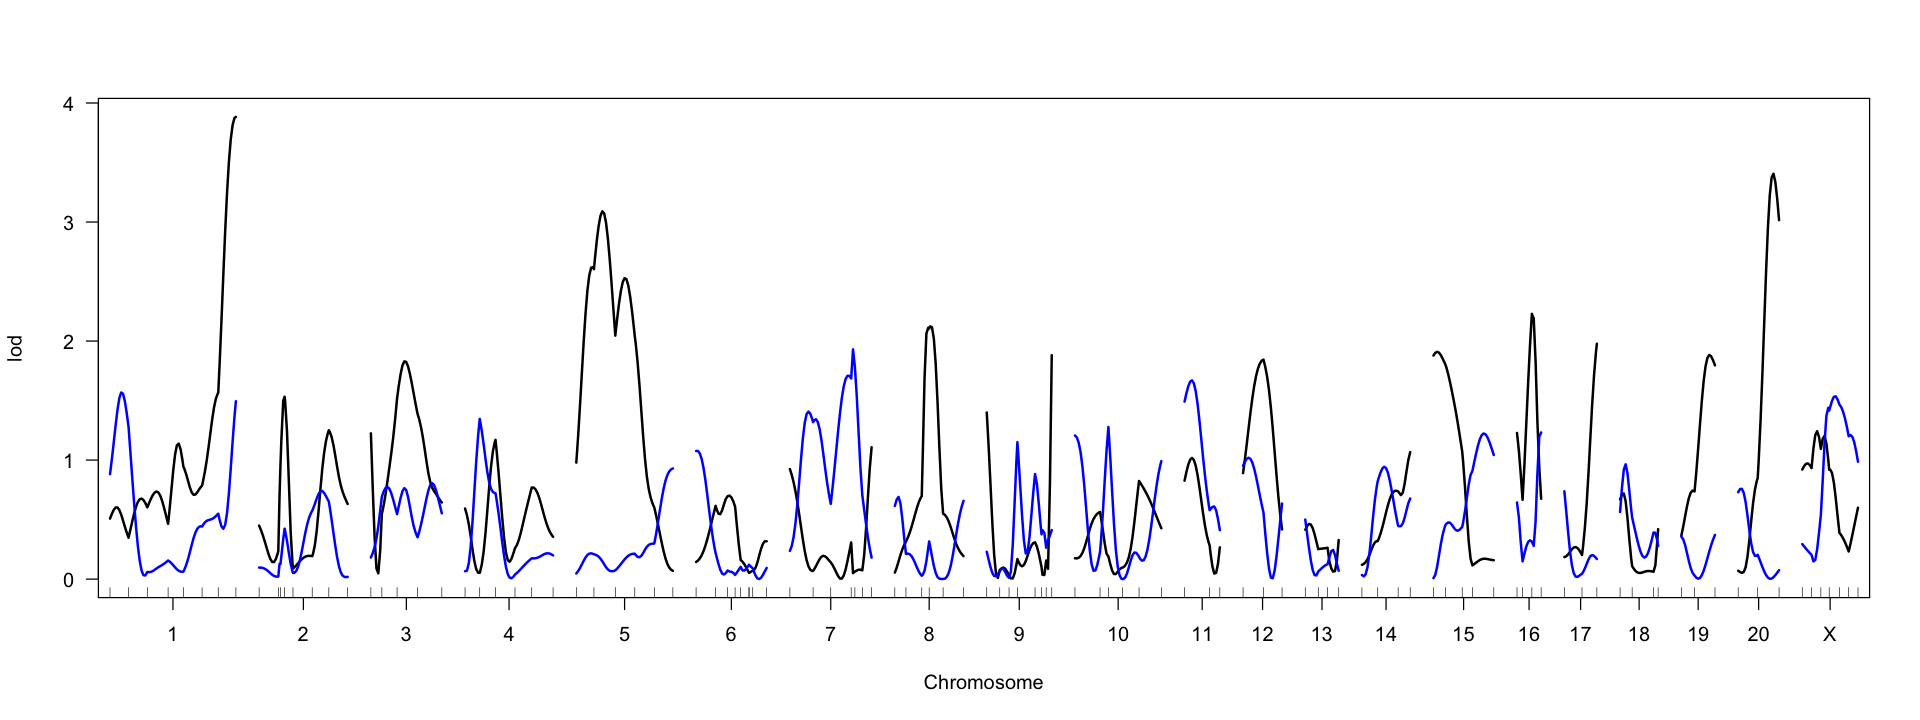

In [11]:
options(repr.plot.width=16)
cr <- calc.genoprob(cr,step=2)
outlmglucose30 <- scanone(cr,pheno.col=log2(cr$pheno$glucose30))
outlmweight11 <- scanone(cr,pheno.col=log2(cr$pheno$weight11))
plot(outlmglucose30,outlmweight11)

# Genetic relatedness in segregating populations

The idea of crossing two or more strains is to construct a family of individuals segregating genetic variation "randomly".

In practice, by design or otherwise, individuals in a cross are related to varying degrees.  This is specially true for multiparental and multi-generational crosses.

The kinship coefficient for two individuals is defined as  the probability that alleles sampled at random from each individual are IBD (identical by descent).

For an F$_2$ cross, the expected kinship between any two individuals is 0.5; in other words they are exchangable.

# Adjusting for multiple genetic loci

$$y_i = \mu + \sum_{k=1}^m \beta_k g_{ik} + \epsilon_i$$

$$ V(y_i) = \sigma^2 + \sum \beta_k^2 E(g_i^2)= \sigma^2 + \tau^2$$
$$ V(y_i,y_j) = \sum \beta_k^2 E(g_{ik}g_{jk}) = \tau^2 k_{ij}$$ 

Assumptions:

- The loci contributing are unlinked (independent).
- The effect sizes are independent of the loci.

$$V(y_i,y_j) = V(\alpha_i,\alpha_j) = \tau^2 k_{ij}$$
$$V(y_i) = V(\alpha_i) + V(\epsilon_i) = \tau^2 + \sigma^2$$

$$y_i = \mu + \gamma_i + \beta g_i + \epsilon_i$$

$$V(\gamma) = \tau^2 K$$
$$V(\epsilon) = \sigma^2 I$$

In [12]:
library(qtl2)
cr2 <- convert2cross2(cr)
map <- insert_pseudomarkers(cr2$gmap, step=1)
pr <- calc_genoprob(cr2, map, error_prob=0.002)
kinship <- calc_kinship(pr)


Attaching package: ‘qtl2’


The following object is masked from ‘package:qtl’:

    clean




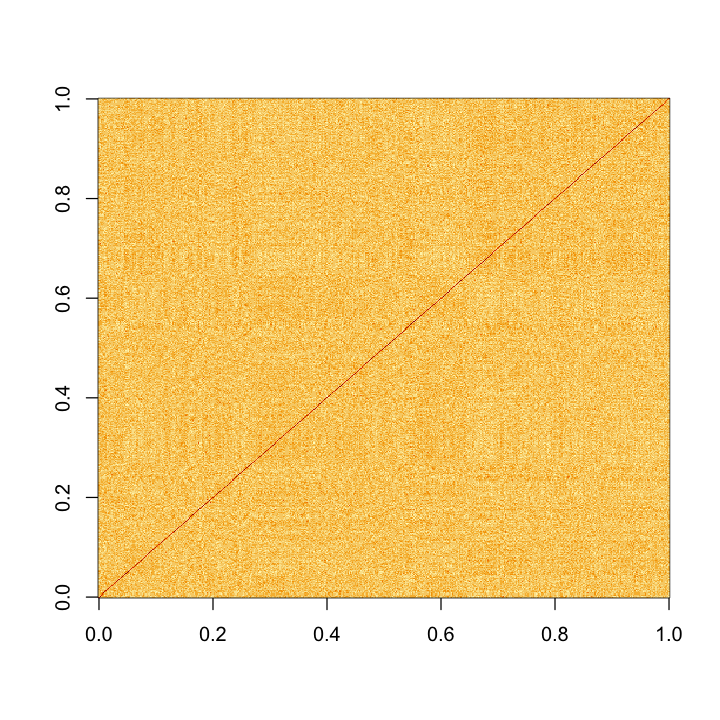

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
image(kinship)

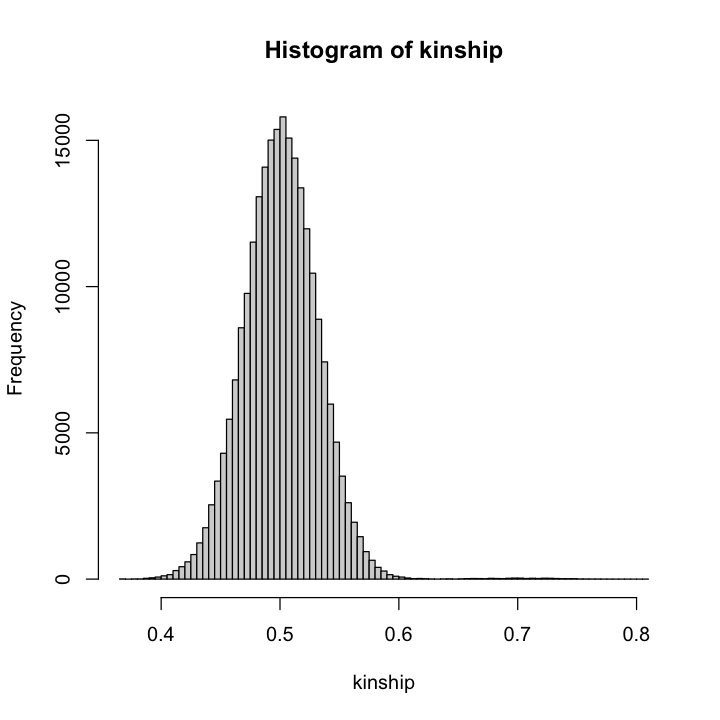

In [14]:
hist(kinship,nclass=100)

In [15]:
lambda <- eigen(0.9999*kinship+0.0001*diag(rep(1,nrow(kinship))))

In [16]:
min(lambda$values)

[1] 1e-04

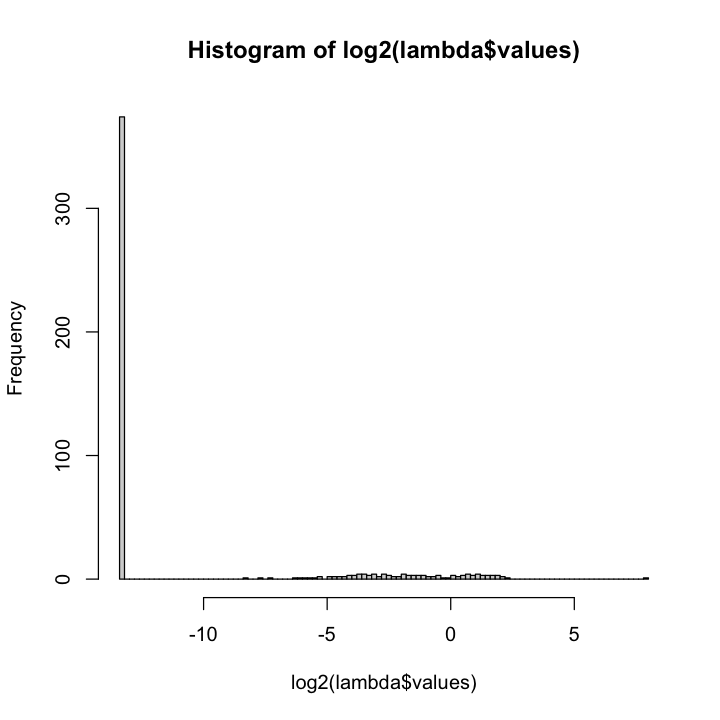

In [17]:
hist(log2(lambda$values),nclass=100)

In [18]:
outlmm <- scan1(pr,pheno=log2(cr2$pheno[,20]))

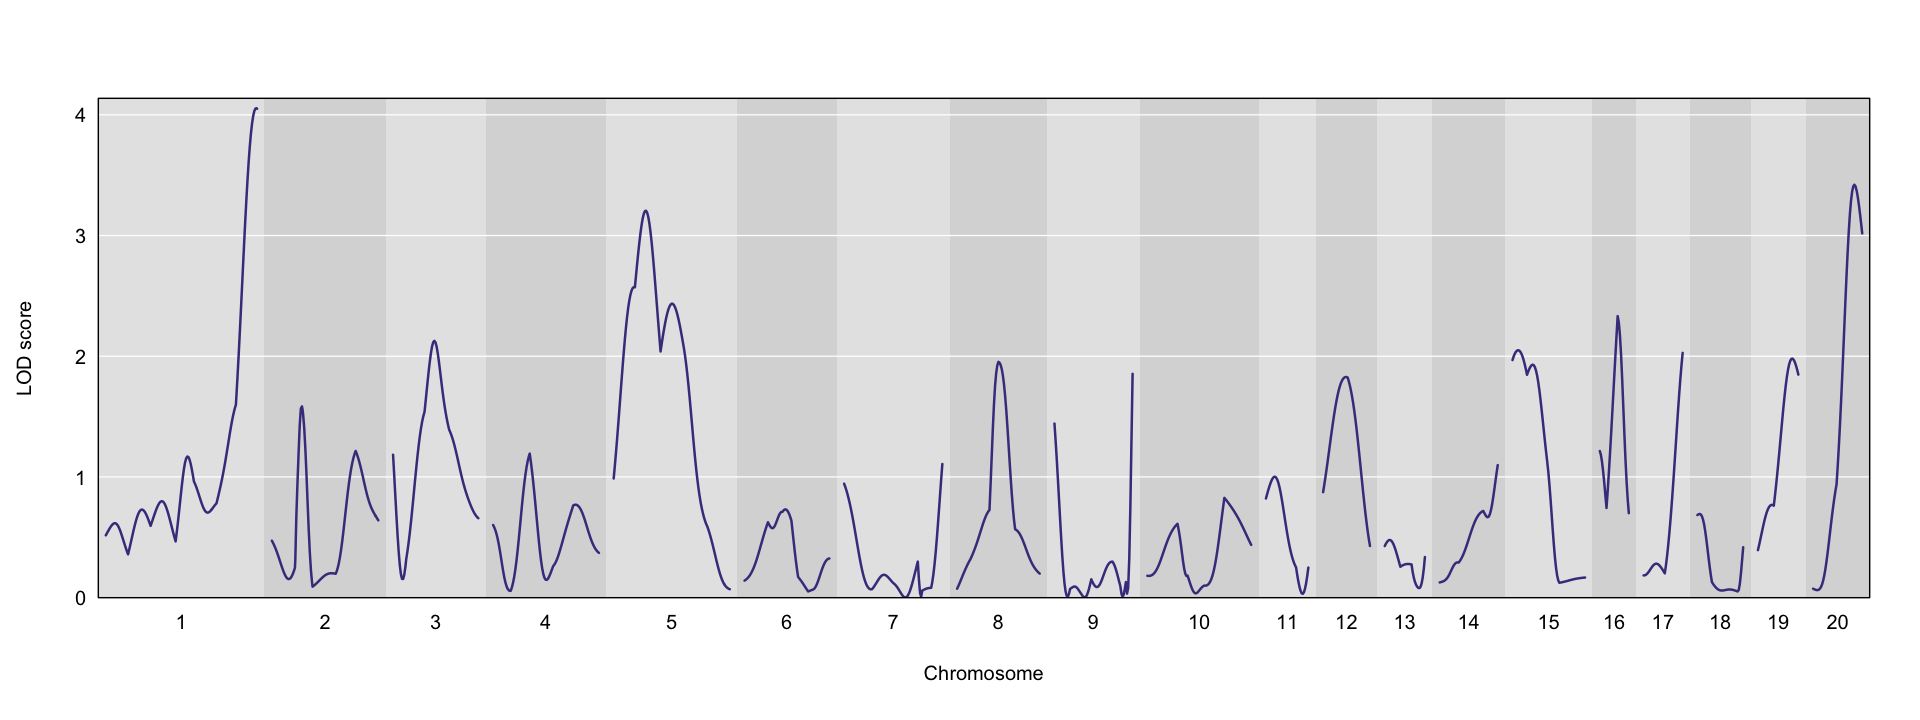

In [19]:
options(repr.plot.width=16)
plot(outlmm,map,chr=as.character(1:20))

In [20]:
cr <- calc.genoprob(cr,step=2)
outlm <- scanone(cr,pheno.col=log2(cr$pheno$glucose30))

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 6 individuals with missing phenotypes.
”


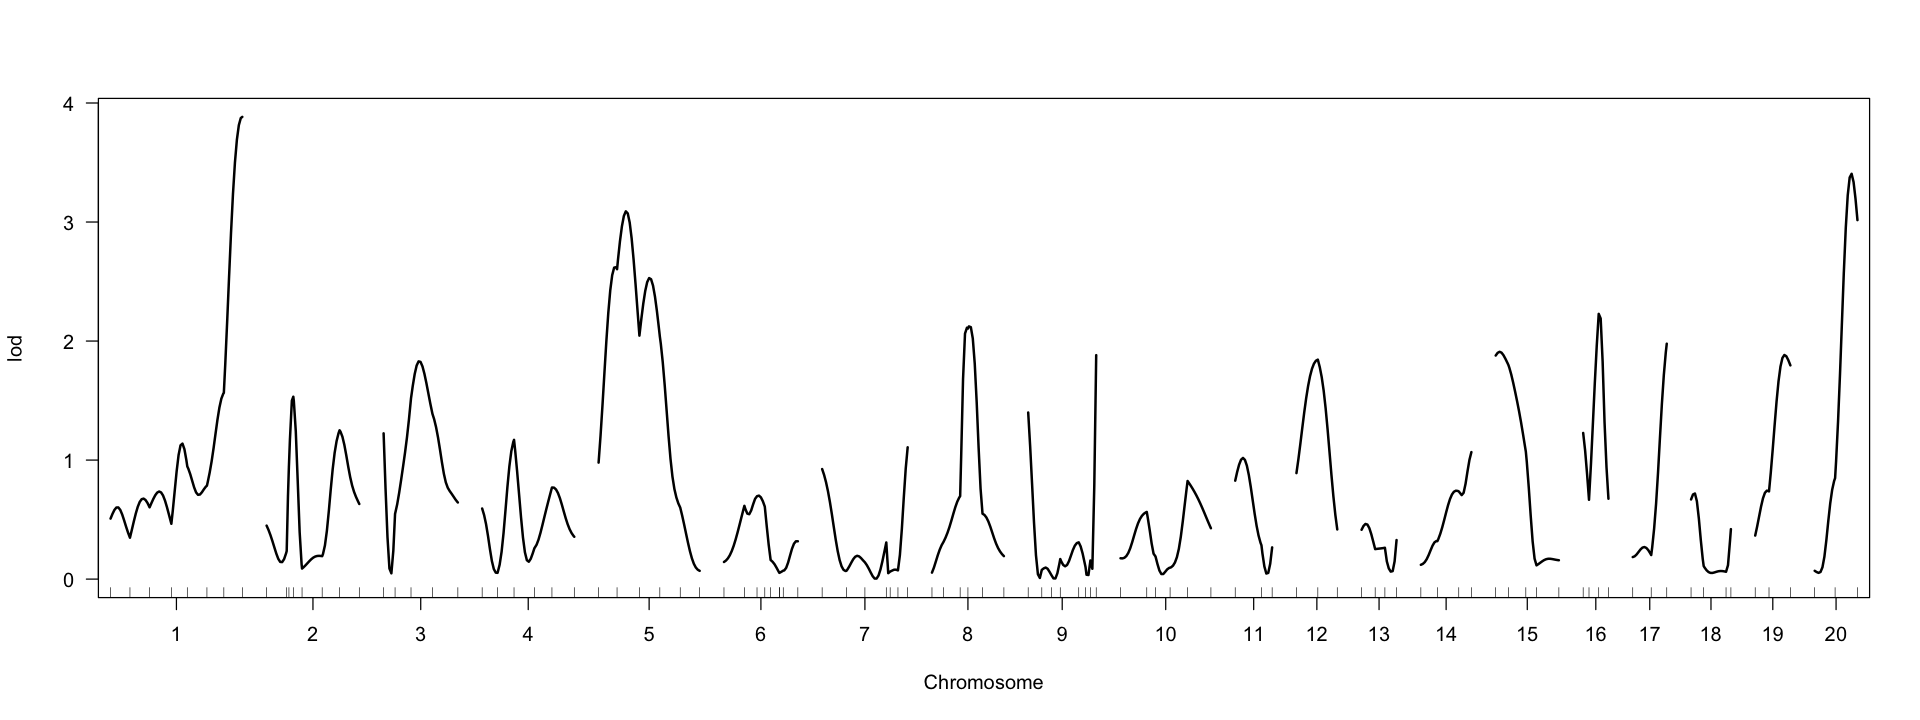

In [21]:
plot(outlm,chr=as.character(1:20))

In [22]:
kinship_loco <- calc_kinship(pr, "loco")
outlmmloco <- scan1(pr, pheno=log2(cr2$pheno[,20]), kinship_loco)

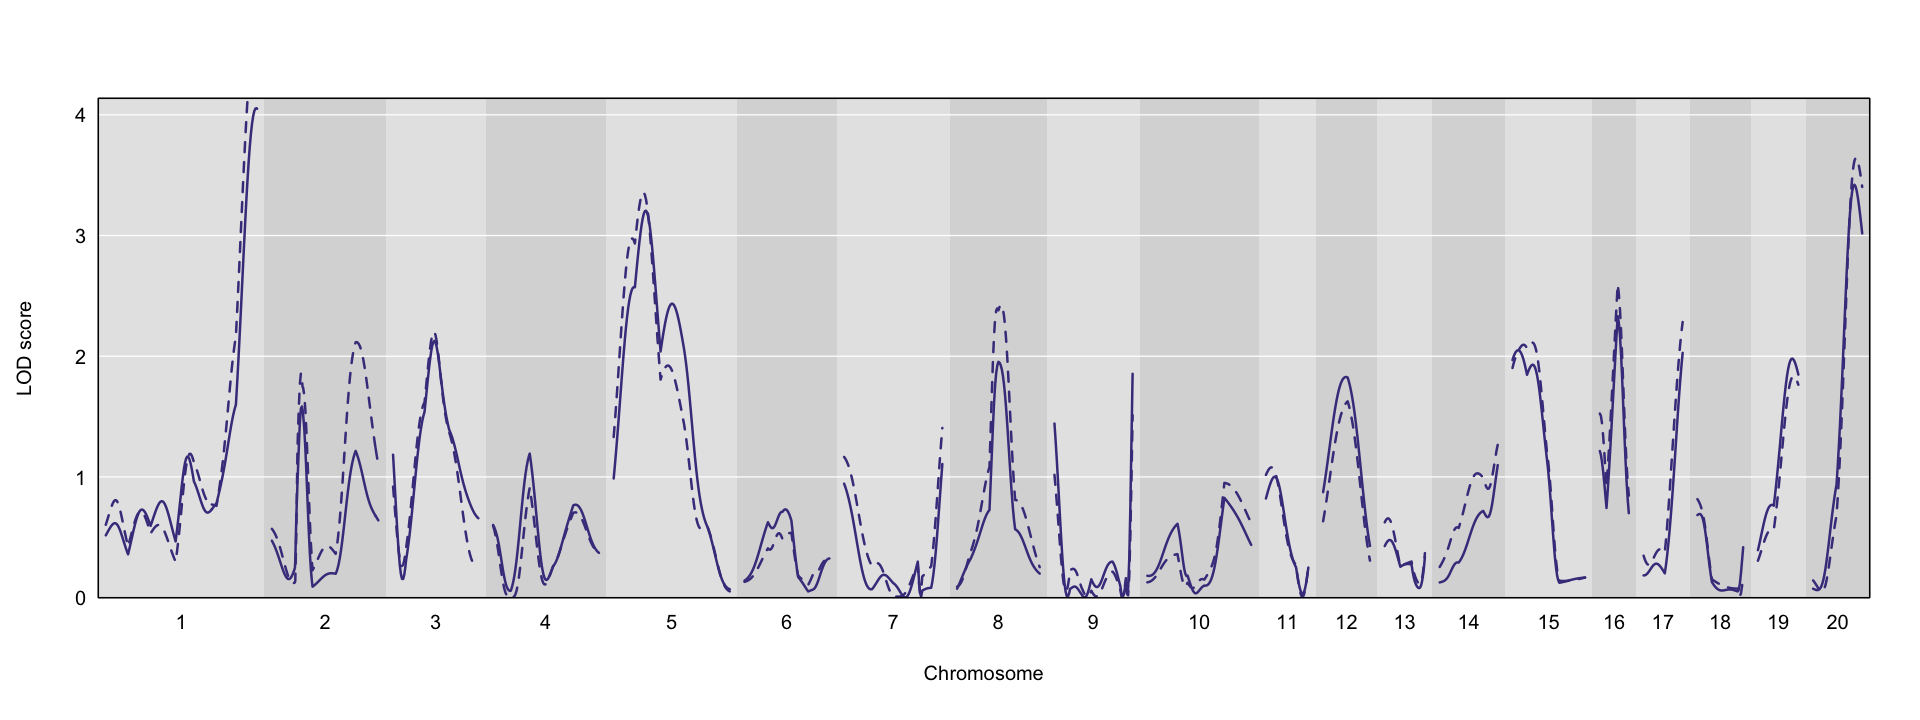

In [23]:
plot(outlmm,map,chr=as.character(1:20))
plot(outlmmloco,map,chr=as.character(1:20),add=T,lty=2)